In [1]:
from tuned_mass_damper import calculate

Setting initial variables...
Initial variables set!

Setting initial conditions...
Initial conditions set!

Solving ODE...
Solving X for t = 0.0...
Calculating pendalum...
Solving X for t = 4.069060926784625e-07...
Calculating pendalum...
Solving X for t = 8.13812185356925e-07...
Calculating pendalum...
Solving X for t = 0.004069874738969982...
Calculating pendalum...
Solving X for t = 0.008138935665754608...
Calculating pendalum...
Solving X for t = 0.012207996592539232...
Calculating pendalum...
Solving X for t = 0.05289860586038548...
Calculating pendalum...
Solving X for t = 0.09358921512823173...
Calculating pendalum...
Solving X for t = 0.134279824396078...
Calculating pendalum...
Solving X for t = 0.5411859170745404...
Calculating pendalum...
Solving X for t = 0.9480920097530029...
Calculating pendalum...
Solving X for t = 1.3549981024314652...
Calculating pendalum...
Solving X for t = 5.42405902921609...
Calculating pendalum...
Solving X for t = 5.42405902921609...
Calculating 

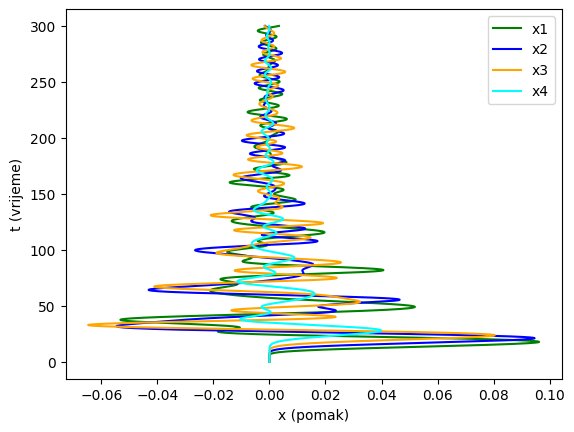

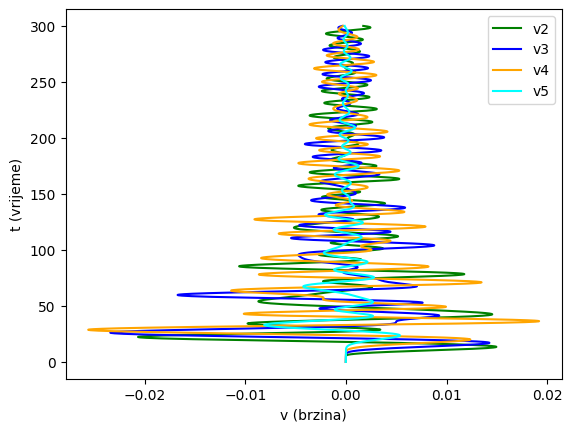

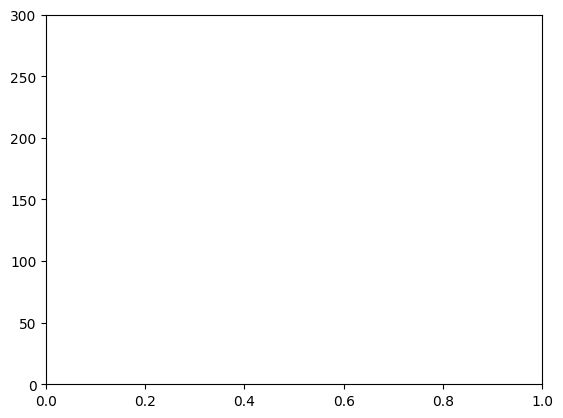

In [2]:
data = calculate()